<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [38]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 160.6 MB/s eta 0:00:0000:01


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [42]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [43]:
## Write your code here

# Display column names
print("Column Names:")
print(df.columns.tolist())

# Display data types
print("\nData Types:")
print(df.dtypes)

# Display summary information
print("\nSummary Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

Column Names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [44]:
## Write your code here

# Drop missing values 
drop_missing = ['YearsCode', 'YearsCodePro', 'DevType',  'CompTotal', 'ConvertedCompYearly', 'WorkExp',  'JobSat']
df.dropna(subset=drop_missing, inplace=True)

# Fill numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts)

/tmp/ipykernel_300/3521128302.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Missing values per column:
ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here

# Value counts for Employment
print(df['Employment'].value_counts())

# Value counts for Job Satisfaction
print(df['JobSat'].value_counts())

# Value counts for Years of Professional Coding Experience
print(df['YearsCodePro'].value_counts())

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


JobSat
0.0      311
1.0      276
2.0      772
3.0     1165
4.0     1130
5.0     1956
6.0     3751
7.0     6379
8.0     7509
9.0     3626
10.0    2251
Name: count, dtype: int64


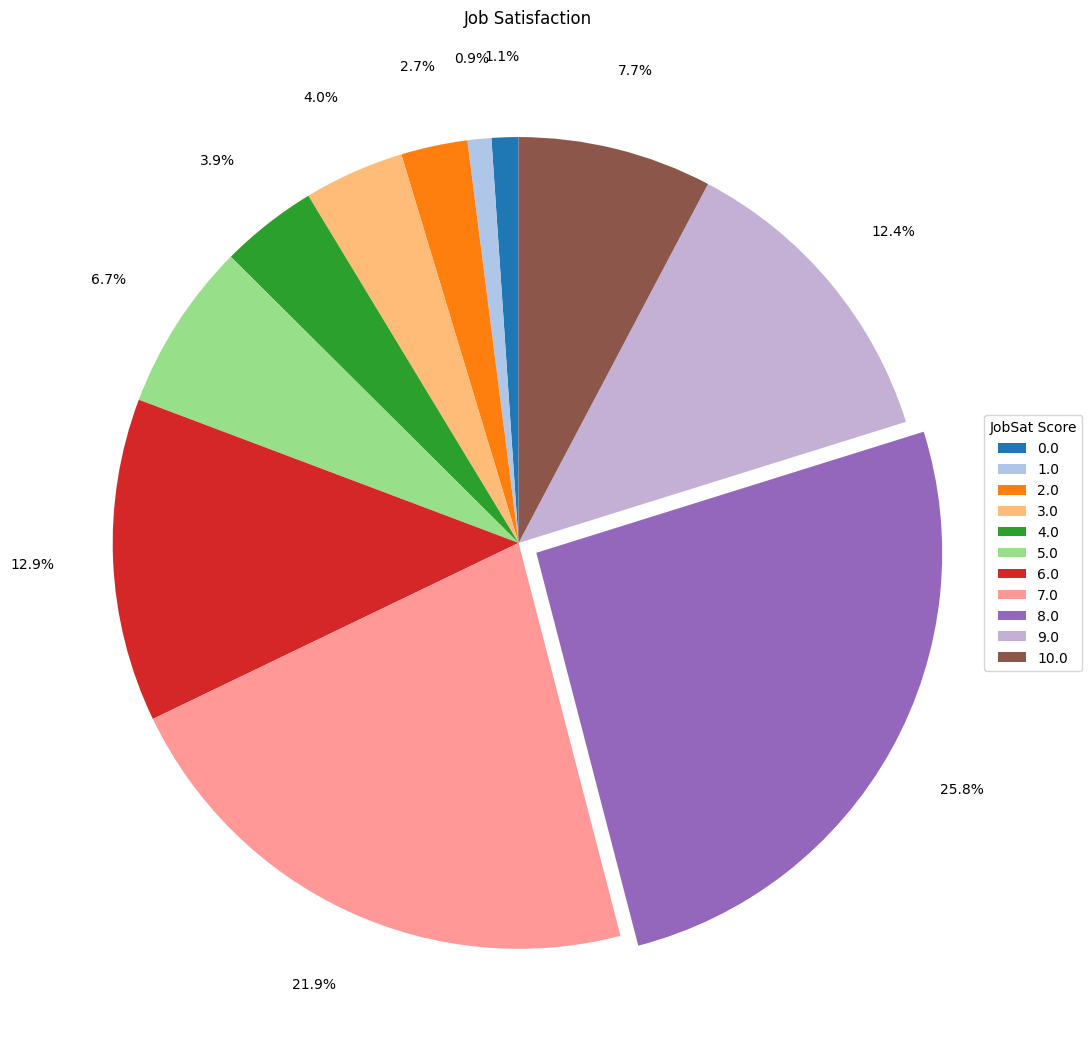

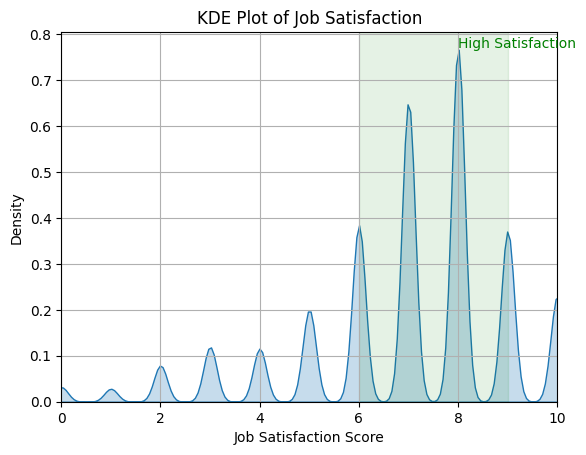

In [74]:
## Write your code here

#Pie Chart

job_sat_counts =df['JobSat'].value_counts().sort_index()
print(job_sat_counts)

explode_list = [0.05 if x in [8] else 0 for x in job_sat_counts.index]

job_sat_counts.plot(kind='pie',
                    figsize=(11, 11),
                    autopct='%1.1f%%',    # show percentages
                    startangle=90,        # start at top
                    labels=None,          # no labels on slices
                    pctdistance=1.2,      # place pct outside slices
                    colors = plt.cm.tab20.colors,  # distinct colors
                    explode = explode_list,
                    ylabel='')            # remove ylabel

plt.title('Job Satisfaction')
plt.axis('equal')  # Make the pie circular

plt.legend(title='JobSat Score',labels=job_sat_counts.index,loc='center left',bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # adjusts layout to fit legend
plt.show()

# KDE Plot
sns.kdeplot(df['JobSat'], bw_adjust=0.5,fill=True)
plt.title('KDE Plot of Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')
plt.xlim(0, 10)
plt.grid(True)
plt.axvspan(6, 9, color='green', alpha=0.1, label='High Satisfaction')
plt.text(8, 0.77, 'High Satisfaction', color='green')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


LanguageHaveWorkedWith
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
PHP                        10951
PowerShell                  8328
Go                          8103
Rust                        7559
Kotlin                      5665
Lua                         3728
Dart                        3594
Assembly                    3233
Ruby                        3147
Swift                       2829
R                           2595
Visual Basic (.Net)         2499
MATLAB                      2378
VBA                         2248
Groovy                      2004
Scala                       1547
Perl                        1482
GDScript                    1402
Objective-C                 1283
Elixir              

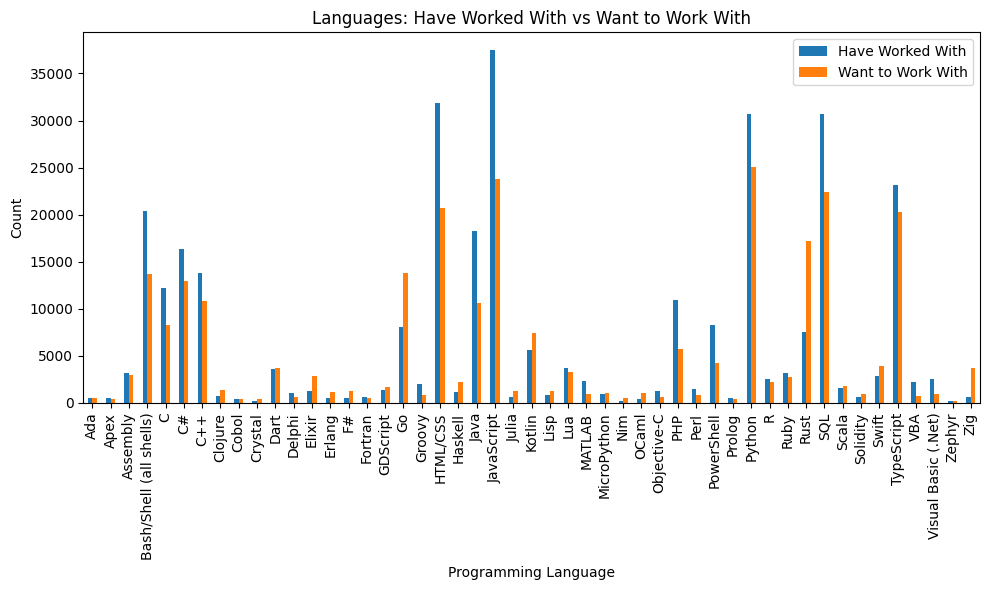

In [20]:
## Write your code here

# Frequency of programming languages in LanguageHaveWorkedWith and LanguageWantToWorkWith.
# Explode 'have worked with' column
have = df['LanguageHaveWorkedWith'].str.split(';').explode().str.strip()
have_counts = have.value_counts()
print(have_counts)
# Explode 'want to work with' column
want = df['LanguageWantToWorkWith'].str.split(';').explode().str.strip()
want_counts = want.value_counts()
print(want_counts)

combined_data = pd.DataFrame({
    'Have Worked With': have_counts,
    'Want to Work With': want_counts
})
combined_data.plot(kind='bar', figsize=(10, 6))
plt.title('Languages: Have Worked With vs Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


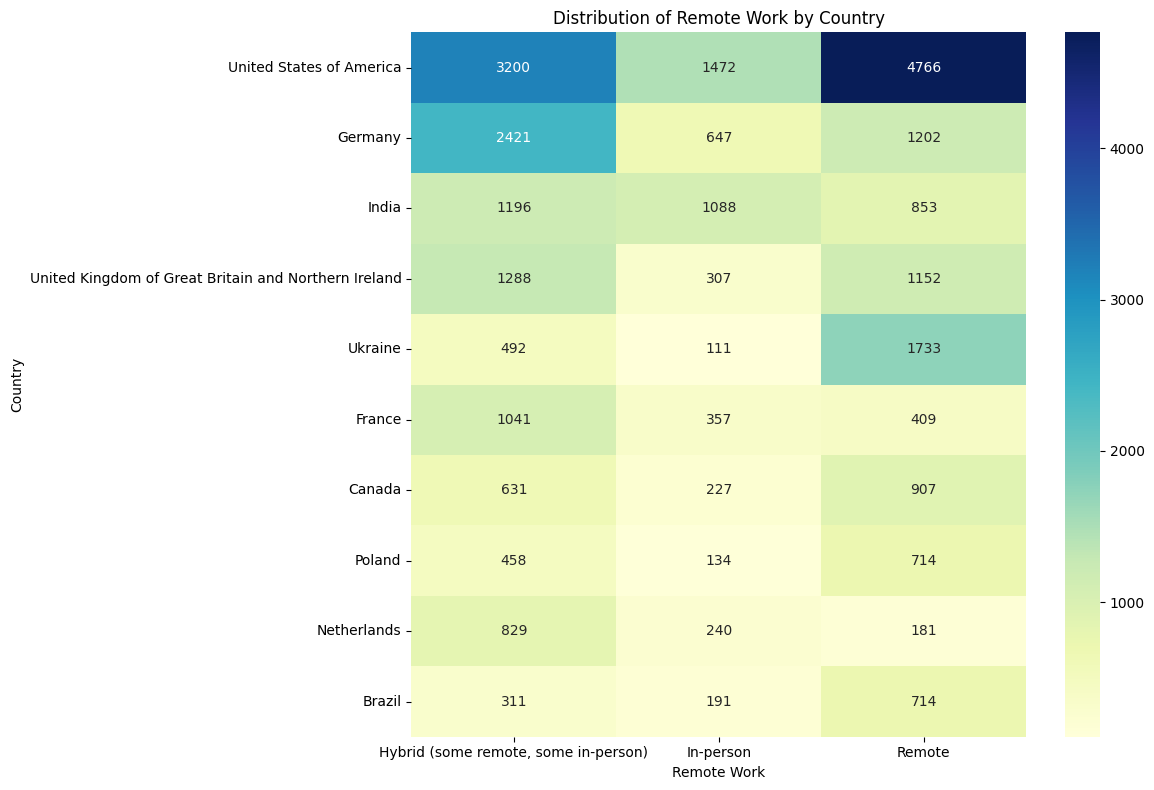

In [34]:
## Write your code here

# Count occurrences by Country and RemoteWork
remoteWork_counts = df.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')

# Step 5: Pivot for heatmap (RemoteWork vs Country)
remoteWork_pivot = remoteWork_counts.pivot(index='Country', columns='RemoteWork', values='Count')

# Filter pivot for top countries only
top_countries = remoteWork_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
remoteWork_top = remoteWork_pivot.loc[top_countries]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(remoteWork_top, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Distribution of Remote Work by Country")
plt.ylabel("Country")
plt.xlabel("Remote Work")
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


The Pearson Correlation Coefficient is 0.10294734215579358  with a P-value of P = 7.354461759103047e-39


Text(0.5, 1.0, 'Correlation Between Professional Coding Experience and Job Satisfaction')

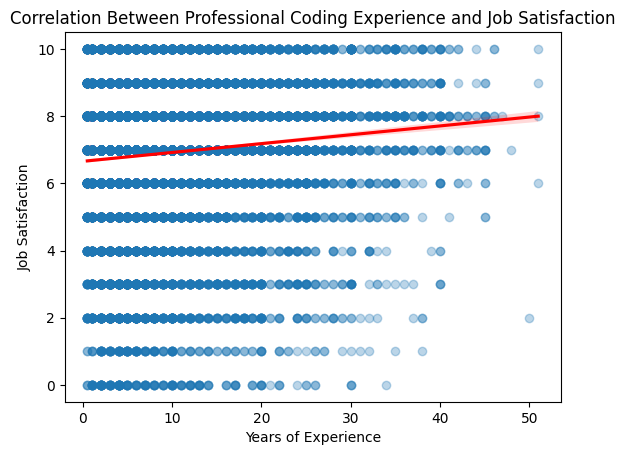

In [56]:
## Write your code here

from scipy import stats

mapping_dict = {
    "Less than 1 year": 0.5,
    "More than 50 years": 51
}
df['YearsCodePro'] = df['YearsCodePro'].replace(mapping_dict)

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

pearson_coef, p_value = stats.pearsonr(df['YearsCodePro'], df['JobSat'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

# Scatter Plot to show Correlation
sns.regplot(x="YearsCodePro", y="JobSat", data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Years of Experience")
plt.ylabel("Job Satisfaction")
plt.title("Correlation Between Professional Coding Experience and Job Satisfaction")


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [84]:
## Write your code here

# Step 2: Split and explode multiple employment types
df_clean = df[['Employment', 'EdLevel']].copy()
df_clean['Employment'] = df_clean['Employment'].str.split(';').explode('Employment').str.strip()  # split employment

# Cross tabulation
df_crosstab =  pd.crosstab(df_clean['Employment'], df_clean['EdLevel'])
df_crosstab

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment,,,,,,,,
"Employed, full-time",180,2637,1636,30,241,308,641,45
"Employed, part-time",16,163,103,2,10,19,48,6
"Independent contractor, freelancer, or self-employed",28,388,286,3,48,47,100,7
"Not employed, and not looking for work",0,1,1,0,0,0,0,1
"Not employed, but looking for work",2,14,7,0,2,0,4,1
Retired,1,0,0,0,1,0,1,0
"Student, full-time",4,83,51,1,8,10,30,2
"Student, part-time",5,87,51,1,13,4,22,3


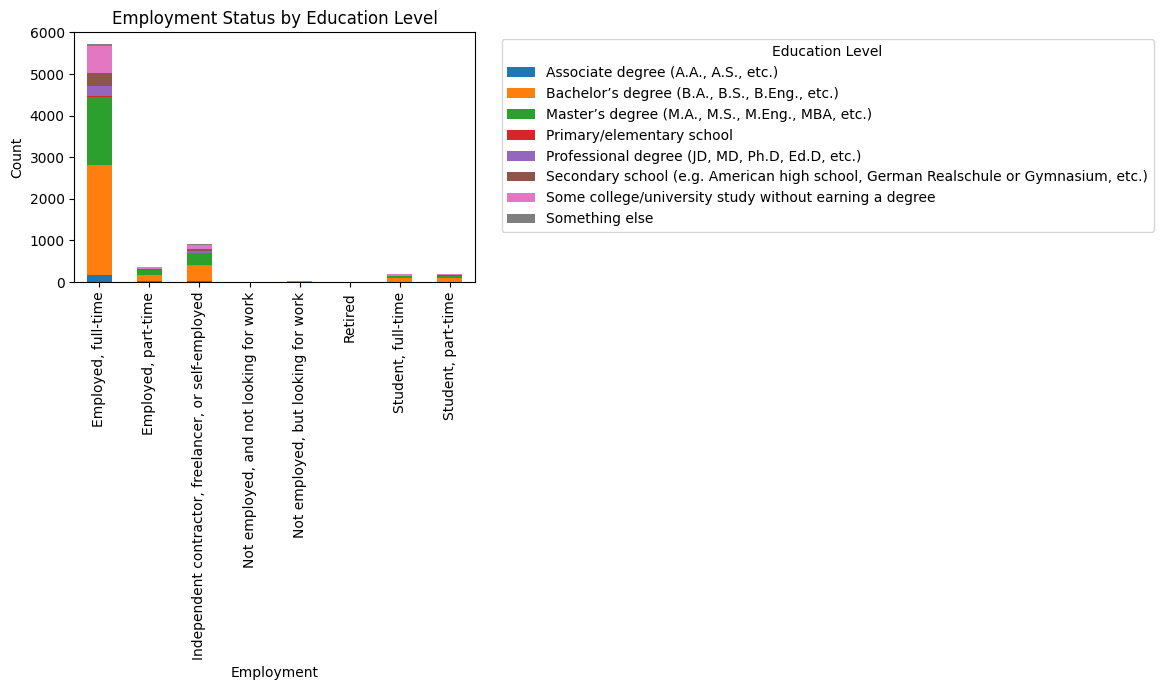

In [83]:
# Stacked bar plot for Employment Status by Education Level
df_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Employment Status by Education Level')
plt.xlabel('Employment')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [85]:
## Write your code here
df.to_csv("cleaned_dataset.csv", index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
